<h1 style="color: green;">Revenue Analysis and Hypothesis Testing for Megaline Users</h1>

## Data Validation and Type Casting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


calls = pd.read_csv("datasets/megaline_calls.csv")
internet=pd.read_csv("datasets/megaline_internet.csv")
messages=pd.read_csv("datasets/megaline_messages.csv")
users = pd.read_csv("datasets/megaline_users.csv")
plans = pd.read_csv("datasets/megaline_plans.csv")

for df in [calls, internet, messages, users, plans]:
    print(df.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   

In [2]:
calls.info()

<class 'pandas.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  str    
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  str    
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 4.2 MB


In [3]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format="%Y-%m-%d")
calls["user_id"] = calls["user_id"].astype(str)
calls["id"] = calls["id"].astype(str)

In [4]:
calls.duplicated().sum()

np.int64(0)

In [5]:
calls.isnull().sum() 

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [6]:
internet.info()

<class 'pandas.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  str    
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  str    
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 3.2 MB


In [7]:
internet["session_date"] = pd.to_datetime(internet["session_date"], format="%Y-%m-%d")
internet["user_id"] = internet["user_id"].astype(str)
internet["id"]= internet["id"].astype(str)

In [8]:
internet.duplicated().sum()

np.int64(0)

In [9]:
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [10]:
messages.info()

<class 'pandas.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            76051 non-null  str  
 1   user_id       76051 non-null  int64
 2   message_date  76051 non-null  str  
dtypes: int64(1), str(2)
memory usage: 1.7 MB


In [11]:
messages["id"] = messages["id"].astype(str)
messages["user_id"] = messages["user_id"].astype(str)
messages["message_date"] = pd.to_datetime(messages["message_date"], format="%Y-%m-%d")


In [12]:
messages.duplicated().sum()

np.int64(0)

In [13]:
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [14]:
users.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     500 non-null    int64
 1   first_name  500 non-null    str  
 2   last_name   500 non-null    str  
 3   age         500 non-null    int64
 4   city        500 non-null    str  
 5   reg_date    500 non-null    str  
 6   plan        500 non-null    str  
 7   churn_date  34 non-null     str  
dtypes: int64(2), str(6)
memory usage: 31.4 KB


In [15]:
cols_to_str = ["user_id", "first_name", "last_name", "city", "plan"]
users[cols_to_str] = users[cols_to_str].astype(str)

cols_to_date = ["reg_date", "churn_date"]
users[cols_to_date] = users[cols_to_date].apply(pd.to_datetime, format="%Y-%m-%d")


In [16]:
users.duplicated().sum()

np.int64(0)

In [17]:
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

churn_date has 466 missing values. It means 466 users haven't churned yet.

In [18]:
users["is_churned"] = users["churn_date"].notna().astype(int)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,0


That's why we create a new column "is churned". it shows us which user is churned or not.

In [19]:
plans["plan_name"] = plans["plan_name"].astype(str)
plans.info()

<class 'pandas.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      str    
dtypes: float64(2), int64(5), str(1)
memory usage: 260.0 bytes


In [20]:
plans.duplicated().sum()

np.int64(0)

In [21]:
plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

The main issues in the dataset were incorrect data types for identifier columns, date columns stored as strings and churn dates appearing as missing values. 

These issues were resolved by converting identifier columns to string types, parsing date columns into datetime format, and treating users with missing churn dates as active users. 

In addition, usage limit variables were stored as integers, while pricing variables were kept as floats to preserve semantic correctness.



### Number of calls made and total minutes used per month

In [22]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [23]:
calls["month"] = calls["call_date"].dt.to_period("M")
calls_per_user = calls.groupby(["user_id","month"]).agg({"id":"count", "duration":"sum"})
calls_per_user = calls_per_user.rename(columns={"id":"calls_count", "duration":"calls_duration"}).reset_index()
calls_per_user.head(11)

,user_id,month,calls_count,calls_duration
0,1000,2018-12,16,116.83
1,1001,2018-08,27,171.14
2,1001,2018-09,49,297.69
3,1001,2018-10,65,374.11
4,1001,2018-11,64,404.59
5,1001,2018-12,56,392.93
6,1002,2018-10,11,54.13
7,1002,2018-11,55,359.76
8,1002,2018-12,47,363.24
9,1003,2018-12,149,1041.00


### Monthly message count per user

In [24]:
messages.head()
messages["month"]= messages["message_date"].dt.to_period("M")
messages_count=messages.groupby(["user_id","month"]).agg({"id":"count"})
messages_count=messages_count.rename(columns={"id":"count_of_messages"}).reset_index()
messages_count.head(11)

,user_id,month,count_of_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
5,1001,2018-12,44
6,1002,2018-10,15
7,1002,2018-11,32
8,1002,2018-12,41
9,1003,2018-12,50


### Monthly internet usage per user

In [25]:
internet.head()
internet["month"]=internet["session_date"].dt.to_period("M")
internet_spent=internet.groupby(["user_id","month"]).agg({"mb_used":"sum"}).reset_index()
internet_spent.head(11)

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
5,1001,2018-12,19369.18
6,1002,2018-10,6552.01
7,1002,2018-11,19345.08
8,1002,2018-12,14396.24
9,1003,2018-12,27044.14


### Monthly payment per user

In [26]:
monthly_usage = (
    calls_per_user
    .merge(messages_count, on=["user_id", "month"], how="left")
    .merge(internet_spent, on=["user_id", "month"], how="left")
    .merge(users[["user_id", "plan","city","age", "is_churned"]], on="user_id", how="left")
    .merge(plans, left_on="plan", right_on="plan_name", how="left")

)
monthly_usage.head()

,user_id,month,calls_count,calls_duration,count_of_messages,mb_used,plan,city,age,is_churned,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16,116.83,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",45,0,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,27,171.14,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,49,297.69,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,65,374.11,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,64,404.59,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,50,15360,500,20,10,0.03,0.03,surf


### Converting Mb to Gb

In [27]:
monthly_usage["gb_used"] = monthly_usage["mb_used"]/1024

monthly_usage["gb_per_month_included"] = monthly_usage["mb_per_month_included"]/1024
monthly_usage.head()

,user_id,month,calls_count,calls_duration,count_of_messages,mb_used,plan,city,age,is_churned,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_used,gb_per_month_included
0,1000,2018-12,16,116.83,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",45,0,1000,30720,3000,70,7,0.01,0.01,ultimate,1.856904,30.0
1,1001,2018-08,27,171.14,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,50,15360,500,20,10,0.03,0.03,surf,6.756982,15.0
2,1001,2018-09,49,297.69,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,50,15360,500,20,10,0.03,0.03,surf,13.002754,15.0
3,1001,2018-10,65,374.11,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,50,15360,500,20,10,0.03,0.03,surf,21.807119,15.0
4,1001,2018-11,64,404.59,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,50,15360,500,20,10,0.03,0.03,surf,18.070605,15.0


### Calculating Monthly Overage

In [28]:
monthly_usage["extra_minutes"] = (monthly_usage["calls_duration"] - monthly_usage["minutes_included"]).clip(lower=0)

monthly_usage["extra_messages"] = (monthly_usage["count_of_messages"] - monthly_usage["messages_included"]).clip(lower=0)

monthly_usage["extra_gb"] = (monthly_usage["gb_used"] - monthly_usage["gb_per_month_included"]).clip(lower=0)

In [29]:
monthly_usage.head()

,user_id,month,calls_count,calls_duration,count_of_messages,mb_used,plan,city,age,is_churned,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_used,gb_per_month_included,extra_minutes,extra_messages,extra_gb
0,1000,2018-12,16,116.83,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",45,0,...,70,7,0.01,0.01,ultimate,1.856904,30.0,0.0,0.0,0.000000
1,1001,2018-08,27,171.14,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,...,20,10,0.03,0.03,surf,6.756982,15.0,0.0,0.0,0.000000
2,1001,2018-09,49,297.69,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,...,20,10,0.03,0.03,surf,13.002754,15.0,0.0,0.0,0.000000
3,1001,2018-10,65,374.11,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,...,20,10,0.03,0.03,surf,21.807119,15.0,0.0,3.0,6.807119
4,1001,2018-11,64,404.59,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,...,20,10,0.03,0.03,surf,18.070605,15.0,0.0,0.0,3.070605


### Calculating extra cost

In [30]:
monthly_usage["extra_cost"]= monthly_usage["extra_minutes"]*monthly_usage["usd_per_minute"
        ]+monthly_usage["extra_messages"]*monthly_usage["usd_per_message"
        ]+monthly_usage["extra_gb"]*monthly_usage["usd_per_gb"]
        
monthly_usage["extra_cost"].head()

0     0.000000
1     0.000000
2     0.000000
3    68.161191
4    30.706055
Name: extra_cost, dtype: float64

### Monthly Revenue

In [31]:
monthly_usage["monthly_revenue"] = monthly_usage["usd_monthly_pay"] + monthly_usage["extra_cost"]
monthly_usage["monthly_revenue"].head()

0    70.000000
1    20.000000
2    20.000000
3    88.161191
4    50.706055
Name: monthly_revenue, dtype: float64

In [32]:
monthly_usage.head()

,user_id,month,calls_count,calls_duration,count_of_messages,mb_used,plan,city,age,is_churned,...,usd_per_message,usd_per_minute,plan_name,gb_used,gb_per_month_included,extra_minutes,extra_messages,extra_gb,extra_cost,monthly_revenue
0,1000,2018-12,16,116.83,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",45,0,...,0.01,0.01,ultimate,1.856904,30.0,0.0,0.0,0.000000,0.000000,70.000000
1,1001,2018-08,27,171.14,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,...,0.03,0.03,surf,6.756982,15.0,0.0,0.0,0.000000,0.000000,20.000000
2,1001,2018-09,49,297.69,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,...,0.03,0.03,surf,13.002754,15.0,0.0,0.0,0.000000,0.000000,20.000000
3,1001,2018-10,65,374.11,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,...,0.03,0.03,surf,21.807119,15.0,0.0,3.0,6.807119,68.161191,88.161191
4,1001,2018-11,64,404.59,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA",28,0,...,0.03,0.03,surf,18.070605,15.0,0.0,0.0,3.070605,30.706055,50.706055


### Monthly usage by plan

In [33]:
monthly_usage.groupby(["plan_name","month"])[["count_of_messages", "calls_duration", "gb_used"]].sum().reset_index()

,plan_name,month,count_of_messages,calls_duration,gb_used
0,surf,2018-01,21.0,385.68,9.521211
1,surf,2018-02,108.0,2527.66,107.040615
2,surf,2018-03,351.0,7152.31,299.751094
3,surf,2018-04,870.0,16619.00,585.166162
4,surf,2018-05,1829.0,29033.10,1040.147979
5,surf,2018-06,2427.0,39499.26,1435.167275
6,surf,2018-07,3243.0,51367.31,1967.042637
7,surf,2018-08,4588.0,62721.48,2619.479717
8,surf,2018-09,5802.0,75852.46,3066.743340
9,surf,2018-10,7718.0,96149.09,3905.954473


Based on total monthly usage, the Surf plan shows higher overall usage in calls, messages, and internet, mainly due to having more users.

### Mean, Variance, Standard Deviation

In [34]:
monthly_usage.groupby("plan_name")[["count_of_messages", "calls_duration", "gb_used"]].mean()

,count_of_messages,calls_duration,gb_used
plan_name,,,
surf,39.980737,412.097890,16.276903
ultimate,46.455959,410.180954,16.873051


Ultimate plan users tend to send slightly more messages and use slightly more internet, while average call duration is very similar across both plans.

In [35]:
monthly_usage.groupby("plan_name")[["count_of_messages", "calls_duration", "gb_used"]].var()

,count_of_messages,calls_duration,gb_used
plan_name,,,
surf,1101.537768,47001.254231,56.737423
ultimate,1084.393818,50510.631705,57.422875


The variance analysis shows that usage patterns vary significantly among users within each plan. Call duration exhibits the highest variability, especially for the Ultimate plan, while message count and internet usage show similar levels of dispersion across both plans.

In [36]:
monthly_usage.groupby("plan_name")[["count_of_messages", "calls_duration", "gb_used"]].std()

,count_of_messages,calls_duration,gb_used
plan_name,,,
surf,33.189423,216.797727,7.532425
ultimate,32.930135,224.745705,7.577788


Although the standard deviation values are lower than the means, they are still relatively large, indicating substantial variability in monthly user behavior.

### Distribution of Monthly Call Duration by Plan

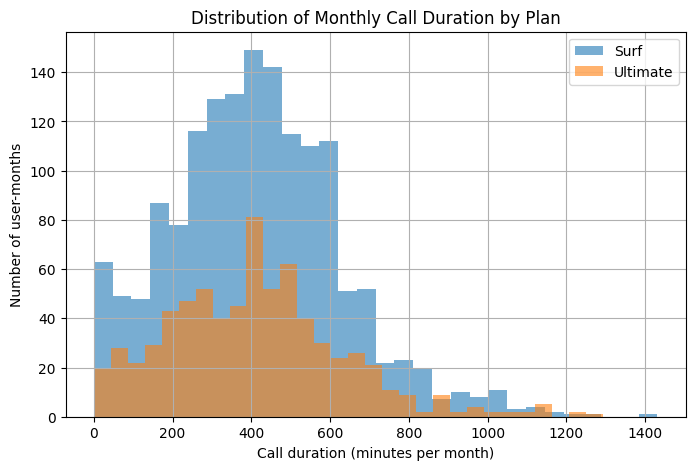

In [37]:
plt.figure(figsize=(8, 5))

monthly_usage[monthly_usage["plan_name"] == "surf"]["calls_duration"].hist(
    bins=30, alpha=0.6, label="Surf")

monthly_usage[monthly_usage["plan_name"] == "ultimate"]["calls_duration"].hist(
    bins=30, alpha=0.6, label="Ultimate")

plt.title("Distribution of Monthly Call Duration by Plan")
plt.xlabel("Call duration (minutes per month)")
plt.ylabel("Number of user-months")
plt.legend()
plt.show()


### Distribution of Monthly Message Usage by Plan

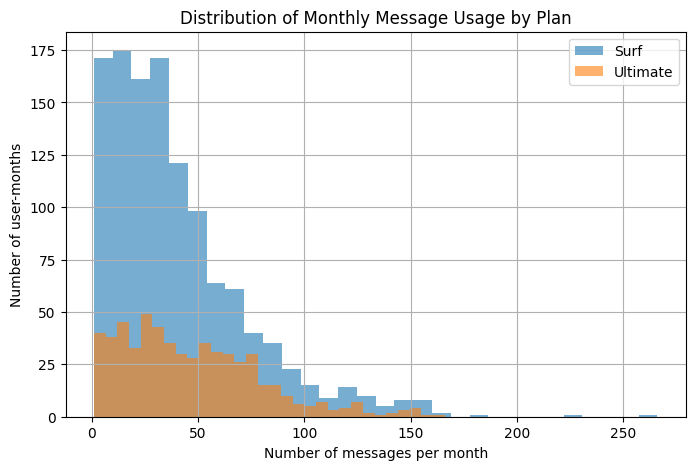

In [38]:
plt.figure(figsize=(8, 5))

monthly_usage[monthly_usage["plan_name"] == "surf"]["count_of_messages"].hist(
    bins=30, alpha=0.6, label="Surf")


monthly_usage[monthly_usage["plan_name"] == "ultimate"]["count_of_messages"].hist(
    bins=30, alpha=0.6, label="Ultimate")

plt.title("Distribution of Monthly Message Usage by Plan")
plt.xlabel("Number of messages per month")
plt.ylabel("Number of user-months")
plt.legend()

plt.show()

### Distribution of Monthly Internet Usage by Plan

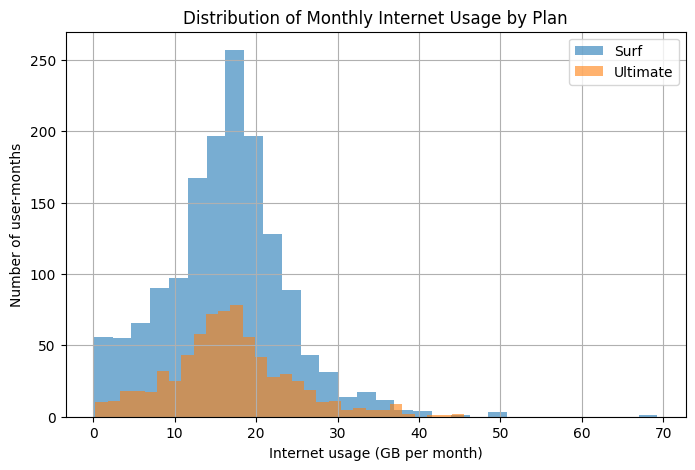

In [39]:
plt.figure(figsize=(8, 5))

monthly_usage[monthly_usage["plan_name"] == "surf"]["gb_used"].hist(
    bins=30, alpha=0.6, label="Surf")

monthly_usage[monthly_usage["plan_name"] == "ultimate"]["gb_used"].hist(
    bins=30, alpha=0.6, label="Ultimate")

plt.title("Distribution of Monthly Internet Usage by Plan")
plt.xlabel("Internet usage (GB per month)")
plt.ylabel("Number of user-months")
plt.legend()
plt.show() 

The Surf plan has more users, which is why the blue bars are higher across the histograms. 

Overall, all three metrics (calls, messages, and internet usage) show right-skewed distributions for both Surf and Ultimate plans. 

However, the Ultimate plan has higher variability, indicating that some users consume significantly more than the average, while Surf users are more concentrated around the mean.

The high variance is caused by differences in user behavior and is partly influenced by rounding of minutes and data usage.

# Hypothesis Test

<h3 style="color:#F1C40F;">
 Hypothesis Testing: Comparison of Monthly Revenue Between Surf and Ultimate Plans
 <h3>

In [40]:
surf_users=monthly_usage[monthly_usage["plan_name"] == "surf"]
ultimate_users=monthly_usage[monthly_usage["plan_name"] == "ultimate"]

In [41]:
surf_users["monthly_revenue"].mean(), ultimate_users["monthly_revenue"].mean()

(np.float64(56.87747466763771), np.float64(72.06292950196999))

Users on the Ultimate plan have a higher average monthly revenue compared to users on the Surf plan

<h3 style="color:#F1C40F;">
We apply the Shapiro-Wilk test separately to Surf and Ultimate groups to check normality.
<h3>

In [42]:
from scipy.stats import shapiro

stat, p_value = shapiro(surf_users['monthly_revenue'].dropna())
print(p_value)

2.723341430625004e-40


In [43]:
from scipy.stats import shapiro

stat, p_value = shapiro(ultimate_users['monthly_revenue'].dropna())
print(p_value)

5.956241319124637e-44


In [44]:
from scipy.stats import shapiro

stat, p_value = shapiro(surf_users['monthly_revenue'].dropna())

if p_value > 0.05:
    print("The 'monthly_revenue' column appears to be normally distributed (fail to reject H0).")
else:
    print("The 'monthly_revenue' column does not appear to be normally distributed (reject H0).")


The 'monthly_revenue' column does not appear to be normally distributed (reject H0).


In [45]:
stat, p_value = shapiro(ultimate_users['monthly_revenue'].dropna())

if p_value > 0.05:
    print("The 'monthly_revenue' column appears to be normally distributed (fail to reject H0).")
else:
    print("The 'monthly_revenue' column does not appear to be normally distributed (reject H0).")


The 'monthly_revenue' column does not appear to be normally distributed (reject H0).


Since the p-value is below 0.05, we reject the null hypothesis and conclude that the distribution is not normally distributed.

<h3 style="color:#F1C40F;">
 Mann–Whitney U Test: Monthly Revenue Comparison Between Surf and Ultimate Plans
 <h3>

In [46]:
from scipy import stats

u_stat, p_value = stats.mannwhitneyu(surf_users['monthly_revenue'].dropna(), ultimate_users['monthly_revenue'].dropna(), alternative='two-sided')

alpha = 0.05
print(f"Mann–Whitney U statistic: {u_stat:.4f}, P-value: {p_value:.10f}")

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀).")
    print("There is a statistically significant difference in the distributions of surf and ultimate plan users.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀).")
    print("There is no statistically significant difference in the distributions of surf and ultimate plan users.")

Mann–Whitney U statistic: 190425.0000, P-value: 0.0000000000

Conclusion: Reject the null hypothesis (H₀).
There is a statistically significant difference in the distributions of surf and ultimate plan users.


##### Conclusion: 
##### The Mann–Whitney U test was used to compare the monthly revenues of users on the Surf and Ultimate plans, since the data did not follow a normal distribution.

##### The test resulted in a p-value smaller than the significance level (α = 0.05). Therefore, the null hypothesis was rejected.

##### This indicates a statistically significant difference between the distributions of monthly revenue for Surf and Ultimate plan users.

<h3 style="color:#F1C40F;">
Hypothesis Testing: Monthly Revenue Differences Across Regions (NY–NJ vs Others)
</h3>

In [47]:
nynj=monthly_usage[monthly_usage["city"].str.contains("NY-NJ")]
other_region=monthly_usage[~monthly_usage["city"].str.contains("NY-NJ")]

nynj_mean = nynj["monthly_revenue"].mean()
other_mean = other_region["monthly_revenue"].mean()

nynj_mean, other_mean

(np.float64(55.29900203573028), np.float64(63.11583427127322))

The average monthly revenue in other regions is higher than in the NY–NJ region

<h3 style="color:#F1C40F;">
We apply the Shapiro-Wilk test separately to NY-NJ and other regions to check normality.
<h3>

In [48]:
from scipy.stats import shapiro

stat, p_value = shapiro(nynj['monthly_revenue'].dropna())
p_value

np.float64(9.219536817494145e-17)

In [49]:
from scipy.stats import shapiro

stat, p_value = shapiro(other_region['monthly_revenue'].dropna())
p_value

np.float64(2.6742989217129533e-42)

In [50]:
from scipy.stats import shapiro

stat, p_value = shapiro(nynj['monthly_revenue'].dropna())

if p_value > 0.05:
    print("The 'monthly_revenue' column appears to be normally distributed (fail to reject H0).")
else:
    print("The 'monthly_revenue' column does not appear to be normally distributed (reject H0).")


The 'monthly_revenue' column does not appear to be normally distributed (reject H0).


In [51]:
from scipy.stats import shapiro

stat, p_value = shapiro(other_region['monthly_revenue'].dropna())

if p_value > 0.05:
    print("The 'monthly_revenue' column appears to be normally distributed (fail to reject H0).")
else:
    print("The 'monthly_revenue' column does not appear to be normally distributed (reject H0).")


The 'monthly_revenue' column does not appear to be normally distributed (reject H0).


Since the p-value is below 0.05, we reject the null hypothesis and conclude that the distribution is not normally distributed.

<h3 style="color:#F1C40F;">
Mann–Whitney U Test: Monthly Revenue Comparison Between Ny-Nj region vs other region users
<h3>

In [ ]:
from scipy import stats

u_stat, p_value = stats.mannwhitneyu(nynj['monthly_revenue'].dropna(), other_region['monthly_revenue'].dropna(), alternative='two-sided')

alpha = 0.05
print(f"Mann–Whitney U statistic: {u_stat:.4f}, P-value: {p_value:.10f}")

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀).")
    print("There is a statistically significant difference in the distributions of Ny-Nj region and Other region users.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀).")
    print("There is no statistically significant difference in the distributions of Ny-Nj region and Other region users.")

Mann–Whitney U statistic: 182847.0000, P-value: 0.0020071683

Conclusion: Reject the null hypothesis (H₀).
There is a statistically significant difference in the distributions of Ny-Nj region and Other region users.


##### Conclusion:
##### To determine whether a parametric or non-parametric test should be used, the Shapiro–Wilk test was applied to check the normality of the monthly revenue distribution for both groups (NY–NJ and other regions).

##### Since the p-values were below the significance level (α = 0.05), the null hypothesis of normality was rejected for both groups. Therefore, a non-parametric Mann–Whitney U test was used for hypothesis testing.